<a href="https://colab.research.google.com/github/hmh10098/d2l/blob/main/7_6_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install d2l

In [18]:
import torch
from torch import nn
from d2l import torch as d2l
from torch.nn import functional as F

In [14]:
class Residual(nn.Module):
  def __init__(self, in_channels, num_channels, use_Conv1x1 = False, stride=1):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels, num_channels, kernel_size=3, padding=1, stride=stride)
    self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3, padding=1)
    if use_Conv1x1:
      self.conv3 = nn.Conv2d(in_channels, num_channels, kernel_size=1, stride=stride)
    else:
      self.conv3 = None
    self.bn1 = nn.BatchNorm2d(num_channels)
    self.bn2 = nn.BatchNorm2d(num_channels)
  def forward(self, X):
    Y = self.bn2(self.conv2(F.relu(self.bn1(self.conv1(X)))))
    if self.conv3:
      X = self.conv3(X)
    Y += X
    return F.relu(Y)

In [4]:
blk = Residual(3, 3)
X = torch.rand(4, 3, 6, 6)
Y = blk(X)
Y.shape

torch.Size([4, 3, 6, 6])

In [5]:
blk = Residual(3, 6, use_Conv1x1=True, stride=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

#Resnet 18



In [6]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [15]:
def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(
                Residual(input_channels, num_channels, use_Conv1x1=True,
                         stride=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

In [8]:
b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))
net = nn.Sequential(b1, b2, b3, b4, b5, nn.AdaptiveAvgPool2d((1, 1)),
                    nn.Flatten(), nn.Linear(512, 10))

loss 0.012, train acc 0.997, test acc 0.905
2264.7 examples/sec on cuda:0


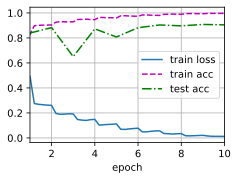

In [9]:
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [10]:
from torchsummary import summary
summary(net, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,200
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,928
       BatchNorm2d-6           [-1, 64, 56, 56]             128
            Conv2d-7           [-1, 64, 56, 56]          36,928
       BatchNorm2d-8           [-1, 64, 56, 56]             128
          Residual-9           [-1, 64, 56, 56]               0
           Conv2d-10           [-1, 64, 56, 56]          36,928
      BatchNorm2d-11           [-1, 64, 56, 56]             128
           Conv2d-12           [-1, 64, 56, 56]          36,928
      BatchNorm2d-13           [-1, 64, 56, 56]             128
         Residual-14           [-1, 64,

#Resnet34


In [16]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3), nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [20]:
b2 = nn.Sequential(*resnet_block(64, 64, 3, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 4))
b4 = nn.Sequential(*resnet_block(128, 256, 6))
b5 = nn.Sequential(*resnet_block(256, 512, 3))
net = nn.Sequential(b1, b2, b3, b4, b5, nn.AdaptiveAvgPool2d((1, 1)),
                    nn.Flatten(), nn.Linear(512, 10))

loss 0.051, train acc 0.982, test acc 0.891
1382.4 examples/sec on cuda:0


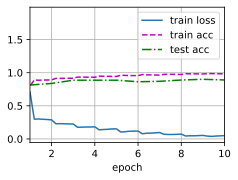

In [23]:
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [25]:
from torchsummary import summary
summary(net, (1, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           3,200
       BatchNorm2d-2           [-1, 64, 48, 48]             128
              ReLU-3           [-1, 64, 48, 48]               0
         MaxPool2d-4           [-1, 64, 24, 24]               0
            Conv2d-5           [-1, 64, 24, 24]          36,928
       BatchNorm2d-6           [-1, 64, 24, 24]             128
            Conv2d-7           [-1, 64, 24, 24]          36,928
       BatchNorm2d-8           [-1, 64, 24, 24]             128
          Residual-9           [-1, 64, 24, 24]               0
           Conv2d-10           [-1, 64, 24, 24]          36,928
      BatchNorm2d-11           [-1, 64, 24, 24]             128
           Conv2d-12           [-1, 64, 24, 24]          36,928
      BatchNorm2d-13           [-1, 64, 24, 24]             128
         Residual-14           [-1, 64,